In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import pingouin as pg

df = pd.read_csv("train.csv")

df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [120]:
df.drop(['Unnamed: 0', 'id', ], axis=1, inplace=True) 

In [121]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [122]:
#finding nulls
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

<Axes: >

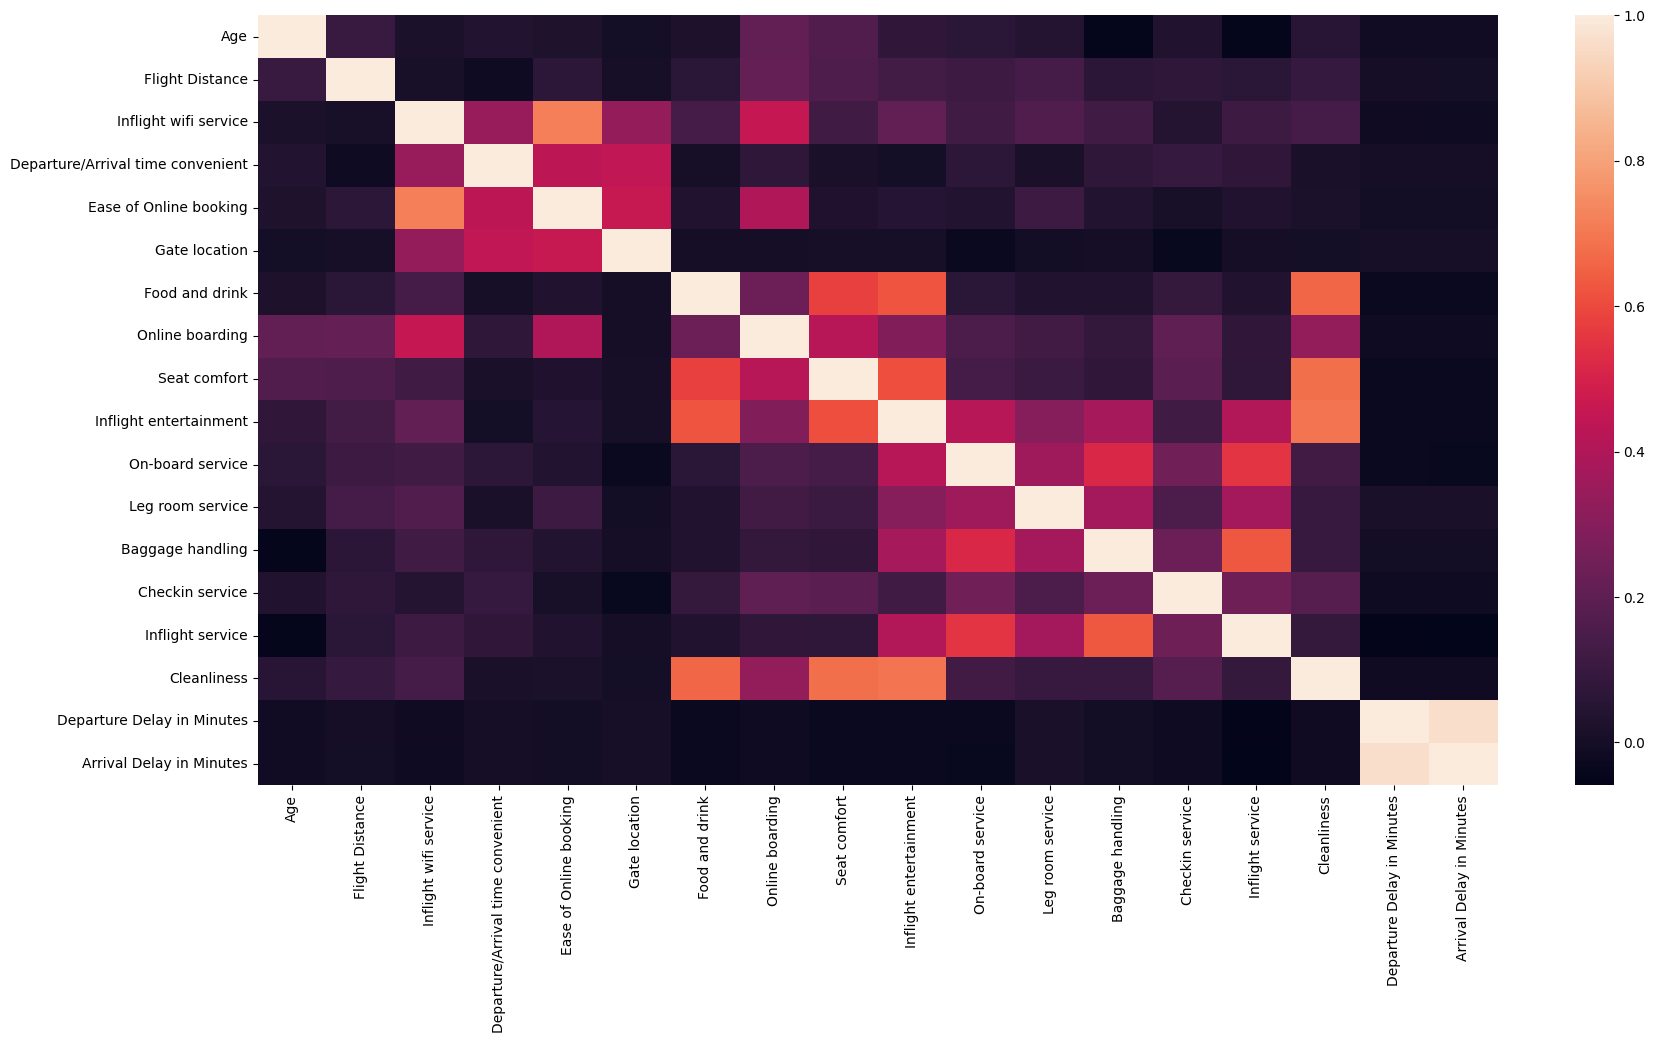

In [123]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include="number").corr())

Some variables are quite highly correlated. However, what really stands out is the extremely high correlation (0.98) between the "Departure Delay in Minutes" and the "Arrival Delay in Minutes". Considering this high correlation and the fact that we had 310 Nan in the "Arrival Delay in Minutes" column, we'll gonna remove it

In [124]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [125]:
#check for duplicates
print(df[df.duplicated()])

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, satisfaction]
Index: []

[0 rows x 22 columns]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


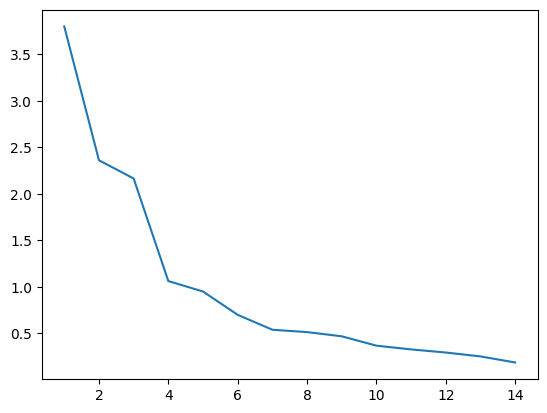

In [126]:
x =df[df.columns[6:20]] 

fa = FactorAnalyzer()
fa.fit(x, 10)

ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)


In [127]:
fa = FactorAnalyzer(4, rotation='varimax')
fa.fit(x)
loadings = pd.DataFrame(fa.loadings_, index=x.columns)
print(loadings)

                                          0         1         2         3
Inflight wifi service              0.092606  0.132303  0.605630  0.478035
Departure/Arrival time convenient -0.006287  0.057166  0.589643  0.000283
Ease of Online booking            -0.036124  0.027503  0.766509  0.463396
Gate location                      0.013097 -0.045142  0.680813 -0.100044
Food and drink                     0.770130  0.002845  0.032987  0.040034
Online boarding                    0.286895  0.118512  0.094301  0.756382
Seat comfort                       0.754094  0.078646 -0.028100  0.213668
Inflight entertainment             0.766237  0.464666  0.041222  0.032708
On-board service                   0.087931  0.700438  0.010385  0.051850
Leg room service                   0.057541  0.483208  0.040559  0.097485
Baggage handling                   0.036738  0.763384  0.047617 -0.030583
Checkin service                    0.116816  0.285782 -0.025507  0.131914
Inflight service                   0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


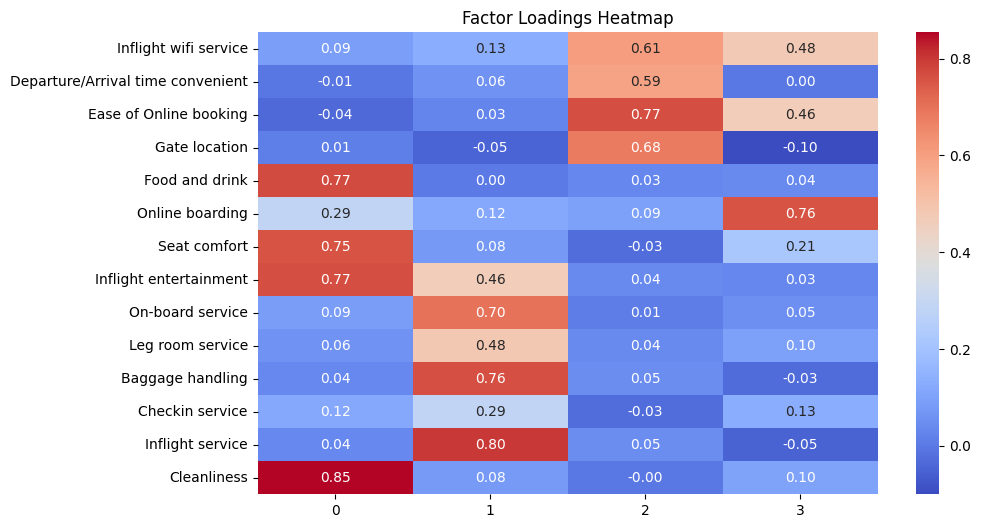

In [128]:
plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Factor Loadings Heatmap')
plt.show()

Here are the 3 factors, the variables they contain and their possible "interpretability":

- Comfort: Food and Drink, Seat comfort, Inflight entertainment, Cleanliness
- Service: Onboard service, Baggage Handling, Inflight Service
- Convenience: In flight Wifi, Departure/Arrival time convenience, Online Booking, Gate Location.

In [129]:
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)

print(factor1_alpha, factor2_alpha, factor3_alpha)

(np.float64(0.8762877916624106), array([0.875, 0.878])) (np.float64(0.79429169330902), array([0.792, 0.796])) (np.float64(0.767975421111067), array([0.766, 0.77 ]))


Factor 1: <br>
- Food and drink loads highly (0.77)
- Seat comfort loads highly (0.75)
- Inflight entertainment loads highly (0.77)
- Cleanliness loads very highly (0.85)

Conclusion for Factor 1:

- This factor is related to the comfort and quality of in-flight services.
- It could be interpreted as "In-flight Service Quality".

Factor 2: <br>
- On-board service loads highly (0.70)
- Baggage handling loads very highly (0.76)
- Inflight service loads very highly (0.80)
- Leg room service moderately loads (0.48)

Conclusion for Factor 2:

- This factor focuses on services related to pre-flight and passenger assistance.
- It may be defined as "Ground Service and Passenger Assistance".

Factor 3: <br>
- Ease of Online booking loads very highly (0.77)
- Gate location loads highly (0.68)
- Departure/Arrival time convenient loads moderately (0.59)
- Inflight wifi service moderately loads (0.61)

Conclusion for Factor 3:

- This factor is focused on travel convenience, including booking, departure/arrival times, and gate location.
- It could be defined as "Travel Convenience and Organization".

Factor 4: <br>
- Online boarding loads very highly (0.76)
- Ease of Online booking moderately loads (0.46)

Conclusion for Factor 4:

- This factor is related to digital services provided by the airline, such as online check-in and booking.
- It may be defined as "Digital Services and Self-service".